# Study of bound states in a AlGaAs/GaAs quantum well

Here we compare the eigenvalues achieved through the pseudo-espectral method to those obtained through the analytical expressions:

\begin{equation} \label{eq:quantum_well_potential_rule_a}
    \begin{split}
        \tan \left( \frac{k a}{2} \right) = \frac{\kappa}{k}
    \end{split}
\end{equation}

\begin{equation} \label{eq:quantum_well_potential_rule_b}
    \begin{split}
        \cot \left( \frac{k a}{2} \right) = -\frac{\kappa}{k}
    \end{split}
\end{equation}

Where,

\begin{equation} \label{eq:quantum_well_potential_rule_k}
    \begin{split}
        k = \sqrt{\frac{2 m_e^* E_n}{\hbar^2}}
    \end{split}
\end{equation}

\begin{equation} \label{eq:quantum_well_potential_rule_kappa}
    \begin{split}
        \kappa = \sqrt{\frac{-2 m_e^* (E_n-V_b)}{\hbar^2}}
    \end{split}
\end{equation}

The quantum well is of type $Al_xGa_{1-x}As / GaAs$ where $x=0.4$.

## Libraries

Those are the necessary libraries.

In [1]:
# python standard
import time

# python extended
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()

# our libraries
from lib.algaas import BarriersWellSandwich

# default configurations
plt.rcParams['figure.figsize'] = 14, 8
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['font.size'] = 20
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 20

## AlGaAs/GaAs helper

In our library we have the `BarriersWellSandwich` which allows for the creation of a structure of a well surrounded by barriers:

```
     ___             ___
____|   |___     ___|   |____
            |___|
```



If we make the barriers' height to be the same as the well's height, we get:

```
____________     ____________
            |___|
```

Text(0,0.5,'V (eV)')

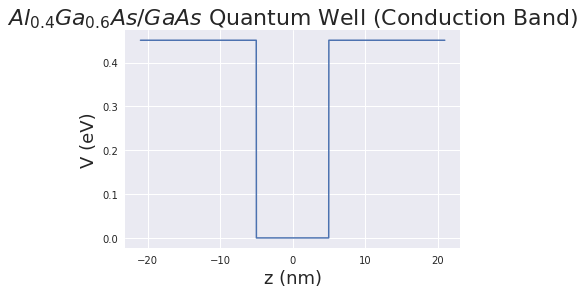

In [2]:
quantum_well = BarriersWellSandwich(b_l=1, d_l=1, w_l=10, 
                                    b_x=0.4, d_x=0.4, w_x=0.0, 
                                    surround=1, offset='well', 
                                    gap_distrib=(0.7, 0.3))
ax = quantum_well.device.plot('z_nm', 'v_ev', 
              legend=False, title='$Al_{0.4}Ga_{0.6}As/GaAs$ Quantum Well (Conduction Band)')
ax.set_xlabel('z (nm)')
ax.set_ylabel('V (eV)')

In [3]:
#quantum_well.time_evolution(steps=1000, dt=1e-19, imaginary=True, n=1, save=False, load=False, verbose=False)
quantum_well.calculate_eigenstates(n=3)

/home/thiago/Documents/master/msc/lib/generic_potential.py:243: ComplexWarning: Casting complex values to real discards the imaginary part
  print("%d: %.10e" % (s, self.values[s]))


0: 1.6891703696e+00
0: 1.6891703696e+00
1: 5.0672471828e+00
1: 5.0672471828e+00
2: 5.6974981581e+00
2: 5.6974515185e+00


/home/thiago/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


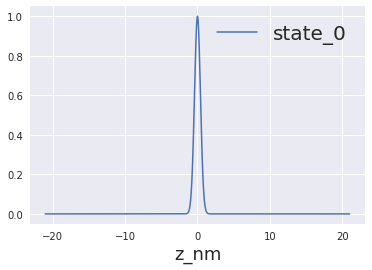

In [4]:
quantum_well.get_eigen_info(0)[0].plot('z_nm', 'state_0')

In [2]:
import numpy as np
import pandas as pd
from lib.algaas import BarriersWellSandwich

quantum_well = BarriersWellSandwich(b_l=1, d_l=1, w_l=10, 
                                    b_x=0.4, d_x=0.4, w_x=0.0, 
                                    surround=1, offset='well', 
                                    gap_distrib=(0.7, 0.3))

quantum_well.calculate_eigenstates(n=3)

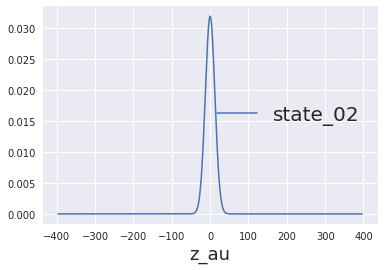

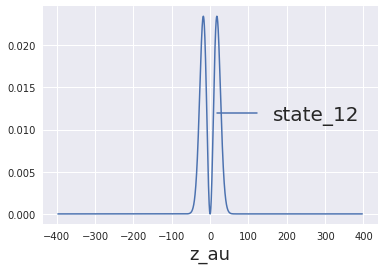

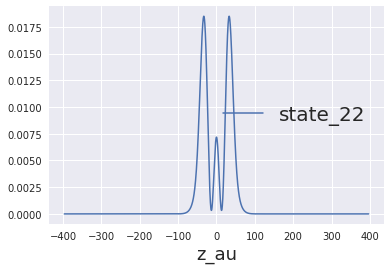

In [4]:
quantum_well.device['state_02'] = np.abs(quantum_well.device['state_0'])**2
quantum_well.device.plot('z_au', 'state_02')
quantum_well.device['state_12'] = np.abs(quantum_well.device['state_1'])**2
quantum_well.device.plot('z_au', 'state_12')
quantum_well.device['state_22'] = np.abs(quantum_well.device['state_2'])**2
quantum_well.device.plot('z_au', 'state_22')
plt.show()

In [6]:
quantum_well._eigenvalue_tool(quantum_well.device['state_1'].values)

5.0672471827928875

In [7]:
quantum_well.m_eff

array([0.067, 0.067, 0.067, ..., 0.067, 0.067, 0.067])